# Dataset: Petient Characteristics

The characteristics of colorectal cancer patients (n=62) are stored in a CSV file. I initiate the data preparation process by examining the data's shape, columns, and data types. I eliminate any unnecessary columns or rows. Subsequently, I conduct exploratory data analysis (EDA) to comprehend the data's structure, patterns, and characteristics. This involves utilizing descriptive statistics and visualization techniques.

## 1. Data Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_Patient = pd.read_csv('Patient_Data_ColorectalCancer.csv')
df_Patient

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0
61,61,GSM877188,57.0,A,Male,Rectum,68.0,1.0,0.0,0.0


In [5]:
# remove empty columns
df_Patient = df_Patient.drop('Unnamed: 0', axis=1)
df_Patient = df_Patient.drop(index=62, axis=0)

#rename columns
df_Patient.rename(columns={'Age (in years)': 'Age_Years', 'Dukes Stage': 'Dukes_Stage', 'DFS (in months)': 'DFS_Months', 'DFS event':'DFS_Event'}, inplace=True)
df_Patient

,ID_REF,Age_Years,Dukes_Stage,Gender,Location,DFS_Months,DFS_Event,Adj_Radio,Adj_Chem
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0


In [6]:
#summary of the DataFrame
df_Patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_REF       62 non-null     object 
 1   Age_Years    62 non-null     float64
 2   Dukes_Stage  62 non-null     object 
 3   Gender       62 non-null     object 
 4   Location     62 non-null     object 
 5   DFS_Months   62 non-null     float64
 6   DFS_Event    62 non-null     float64
 7   Adj_Radio    62 non-null     float64
 8   Adj_Chem     62 non-null     float64
dtypes: float64(5), object(4)
memory usage: 4.5+ KB


In [7]:
#save df_Patient to new file
df_Patient.to_csv('df_Patient_working', index=False)

## 2. Exploratory Data Analysis 

### 2.1. Analyzing Quantitative Variables
**Descriptive Statistics + Histogram/boxplot** : distribution of age and DFS

In [16]:
# Check for missing values
missing_values = df_Patient.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


In [8]:
patient_char = ['Age_Years','DFS_Months']
df_Patient[patient_char].describe()

,Age_Years,DFS_Months
count,62.000000,62.000000
mean,61.112903,41.774194
std,9.581582,26.288076
min,28.000000,4.000000
25%,56.250000,19.500000
50%,62.000000,38.000000
75%,67.000000,57.500000
max,78.000000,108.000000


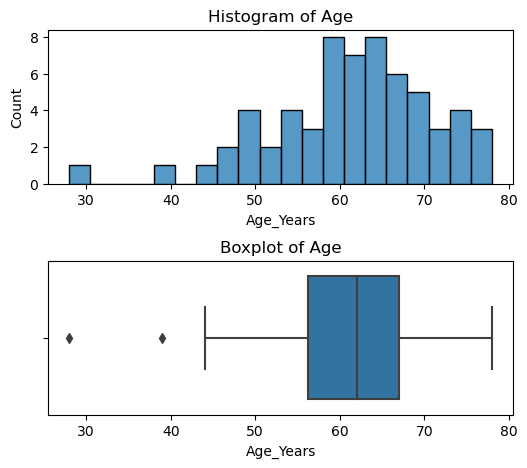

In [10]:
#histogram and box plot of age
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5))

sns.histplot(data=df_Patient, x='Age_Years', bins=20, ax=axes[0])
axes[0].set_title('Histogram of Age')

sns.boxplot(data=df_Patient, x='Age_Years', ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.subplots_adjust(hspace=0.5)
plt.show()

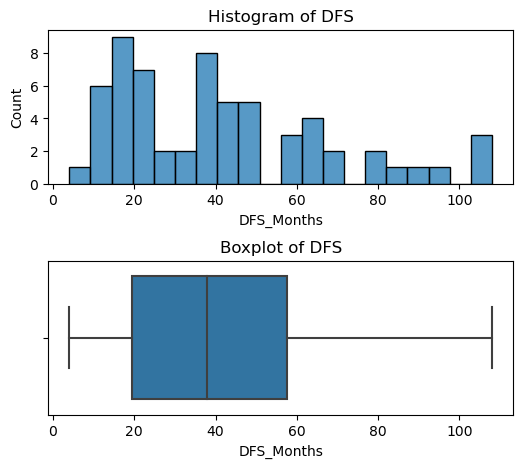

In [22]:
#histogram and box plot of DFS
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5))

sns.histplot(data=df_Patient, x='DFS_Months', bins=20, ax=axes[0])
axes[0].set_title('Histogram of DFS')

sns.boxplot(data=df_Patient, x='DFS_Months', ax=axes[1])
axes[1].set_title('Boxplot of DFS')

plt.subplots_adjust(hspace=0.5)
plt.show()


### 2.2. Analyzing Categorical Variables
**Bar chart**: Distribution of Dukes state, location, DFS event, and patients who received radiotherapy and chemotherapy

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_bar(df, column_list, title=''):
    """Plot bar graphs for multiple columns in the DataFrame.

    Parameters:
    - df: DataFrame
    - column_list: list of str, column names to plot
    - title: str, title of the multiple plots
    """
    
    # Determine the number of rows and columns based on the number of plots
    num_plots = len(column_list)
    num_rows = (num_plots + 1) // 2  # Ensure at least 1 row
    num_cols = 2  # Maximum 2 columns
    
    # Set up subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
    
    # Flatten the axes array to handle different cases
    axes = axes.flatten()
    
    # Loop through columns and plot bar graphs
    for i, column in enumerate(column_list):
        value_counts_sorted = df[column].value_counts().sort_index()
        sns.barplot(x=value_counts_sorted.index, y=value_counts_sorted, ax=axes[i])
        axes[i].set_title(f'{column} Distribution')
        
    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title)
    plt.subplots_adjust(top=0.9)  # Adjust the top of the figure to make room for suptitle
    
    plt.show()

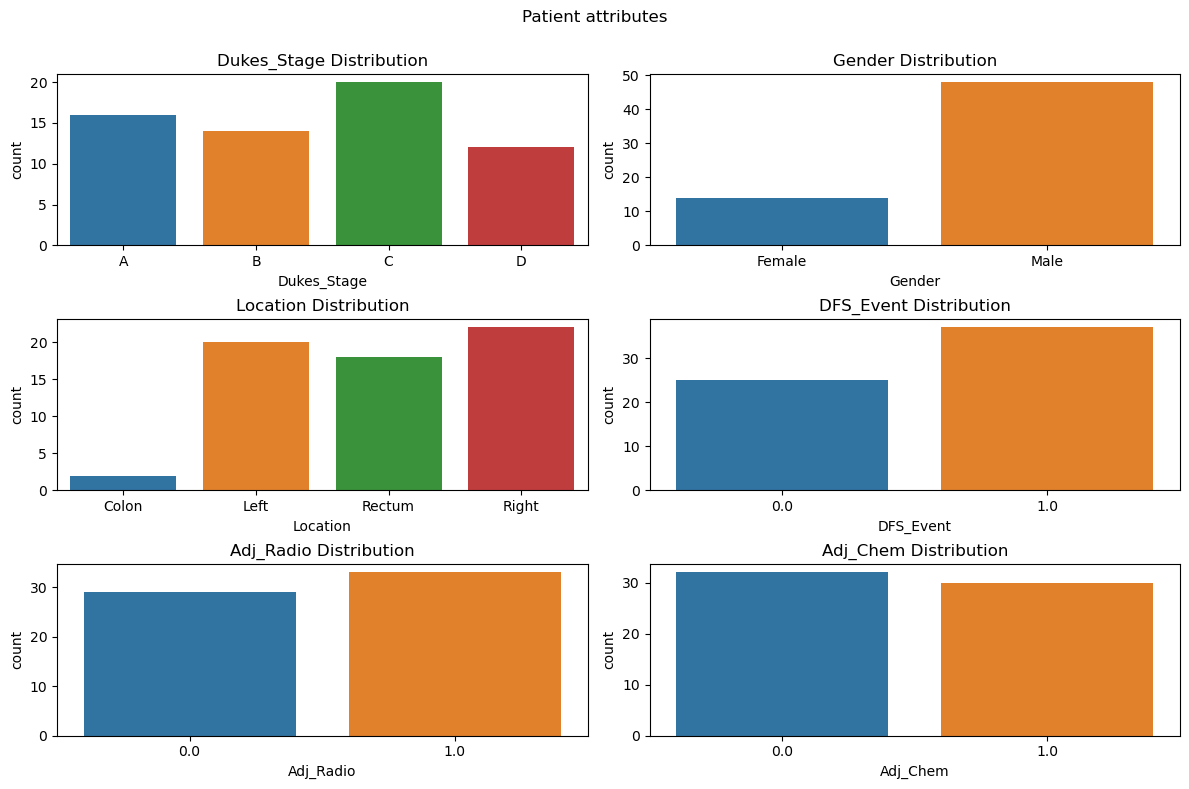

In [16]:
patient_attributes = ['Dukes_Stage', 'Gender', 'Location', 'DFS_Event', 'Adj_Radio', 'Adj_Chem']
plot_multiple_bar(df_Patient, patient_attributes, title='Patient attributes')


### 2.3. Multivariate Analysis
1. **Box Plots:** Compare the distribution of DFS across different categories (e.g., Dukes stage, Adj_Chem)
2. Explore correlations between quantitative variables like age and DFS.

<Axes: xlabel='DFS_Months', ylabel='Dukes_Stage'>

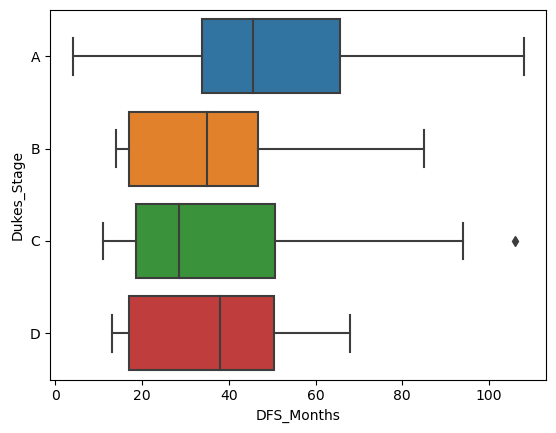

In [17]:
## boxplot of DFS_Months by Dukes stage
sns.boxplot(data=df_Patient, x='DFS_Months', y='Dukes_Stage')

<Axes: xlabel='Adj_Chem', ylabel='DFS_Months'>

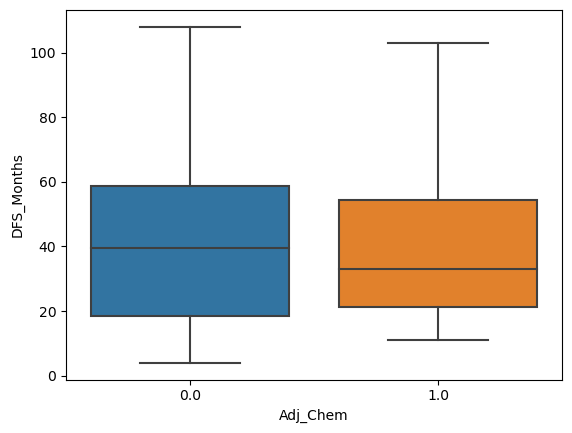

In [18]:
# boxplot of DFS_Months by Adj_Chem
sns.boxplot(data=df_Patient, x='Adj_Chem', y='DFS_Months')

In [19]:
#Pearson's correlation between Age and DFS

import scipy.stats

correlation_coff, p_value = scipy.stats.pearsonr(df_Patient['Age_Years'], df_Patient['DFS_Months'])
print(f"Pearson Correlation Coefficient: {correlation_coff}")
print(f"p-value: {p_value}")

Pearson Correlation Coefficient: -0.11789439116090786
p-value: 0.36145423297301793


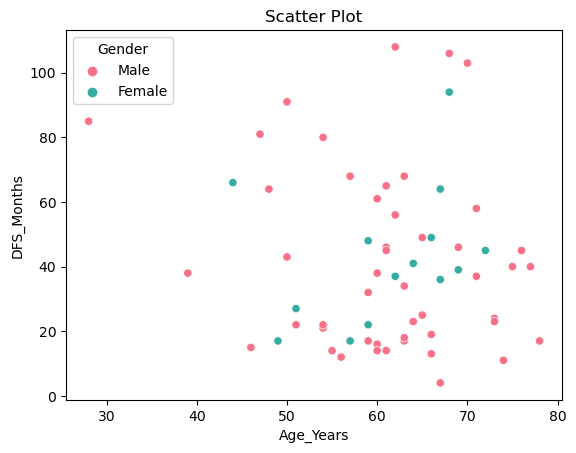

In [20]:
# Scatter plot of between Age and DFS confirms a weak linear association
sns.scatterplot(data=df_Patient, x='Age_Years', y='DFS_Months', hue='Gender', palette=sns.color_palette("husl", 2))

plt.xlabel('Age_Years')
plt.ylabel('DFS_Months')
plt.title('Scatter Plot')
plt.show()

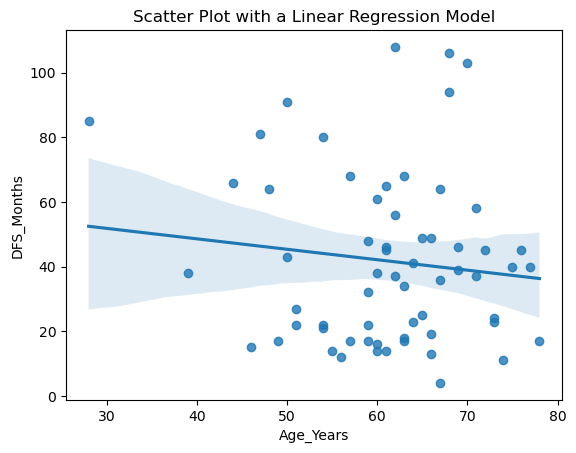

In [21]:
#Try to plot data with a linear regression model fit

sns.regplot(data=df_Patient, x='Age_Years', y='DFS_Months')

plt.xlabel('Age_Years')
plt.ylabel('DFS_Months')
plt.title('Scatter Plot with a Linear Regression Model')
plt.show()

(0.0, 155.50534896703564)

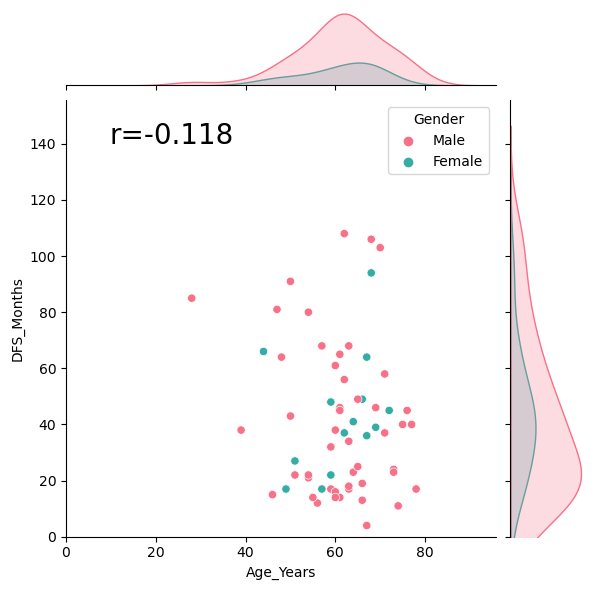

In [33]:
#plot 2 variables with bivariate and univariate graphs
a = sns.jointplot(data=df_Patient, x="Age_Years", y="DFS_Months", hue='Gender', palette=sns.color_palette("husl", 2))
r = df_Patient[["Age_Years", "DFS_Months"]].corr().iloc[1,0]
a.ax_joint.annotate('r=%.3f' %r, xy=(0.1,0.9), xycoords='axes fraction', size=20)
a.ax_joint.set_xlim(0)
a.ax_joint.set_ylim(0)